In [1]:
import pandas as pd 
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline
sns.set_style("white")

base_dir = os.path.dirname(os.getcwd())

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
sns.set_style(style='ticks')

# Study 1

Participant's own behavior + perceptions of their own connection

## Figure 1

Count differences in long gaps between friends and strangers

For code that plots distributions of gap lengths for each conversation, see the notebook "Study 1 - do friends use more long gaps?"

In [2]:
long_gaps = pd.read_csv(os.path.join(base_dir, 'Analyses', 'long_gap_counts.csv'))

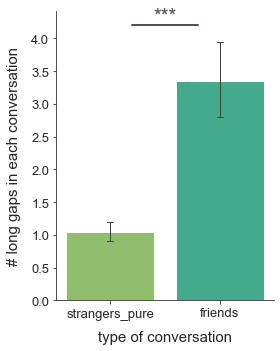

In [3]:
plt.figure(figsize=(4,5))

ax = sns.barplot(x="condition", y="n_long_2000", data=long_gaps, 
                 palette=['#90be6d', '#43aa8b'],
                saturation=1, errwidth=1,
                 capsize=.05)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('# long gaps in each conversation', fontsize=15, labelpad=10)
ax.tick_params(labelsize=13)

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = .0
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 4.2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig1.pdf'), dpi=300)


## Figure 2 (top)

How does connection change over time (from a baseline 6 seconds before a long gap)?

In [4]:
long_gaps_all = pd.read_csv(os.path.join(base_dir, 'Analyses', 'long_gap_connection_all_long_format_baseline.csv'))


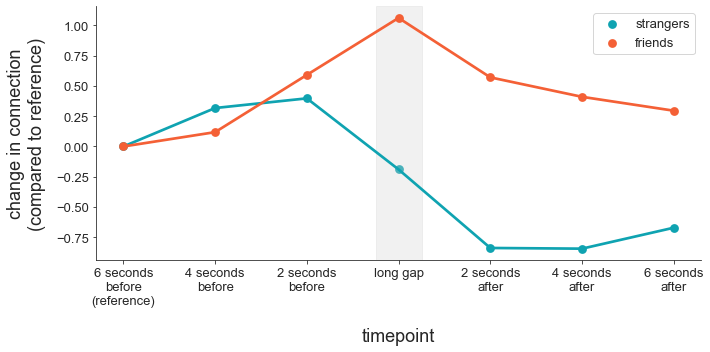

In [5]:
plt.figure(figsize=(10,5))

timepoint_labels = ['6 seconds\nbefore\n(reference)', '4 seconds\nbefore', '2 seconds\nbefore', 'long gap',
                   '2 seconds\nafter', '4 seconds\nafter', '6 seconds\nafter']

friend_color = '#F46036'
stranger_color = '#0FA3B1'

ax = sns.pointplot(x="timepoint", y="connection_change", hue="condition",
                   data=long_gaps_all, dodge=False,
                  order=["3_before", "2_before", "1_before", 'long_gap', '1_after', '2_after', '3_after'],
                  palette = [stranger_color,friend_color], markers='o', ci=None)

plt.xlabel("timepoint", fontsize=18, labelpad=20)
plt.ylabel("change in connection\n(compared to reference)", fontsize=18, labelpad=10)

ax.tick_params(labelsize=13)
plt.legend(fontsize='13')

ax.set_xticklabels(timepoint_labels)

ax.axvspan(2.75, 3.25, alpha=0.3, color='lightgrey')

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig2_top.pdf'), dpi=300)


## Figure 2 (bottom)

How does connection change for friends and stangers when entering (one_before) and exiting (one_after) a long gap?

In [6]:
long_gaps_all = pd.read_csv(os.path.join(base_dir, 'Analyses', 'long_gap_connection_all_long_format.csv'))

one_before = long_gaps_all.loc[long_gaps_all['timepoint'] == '1_before'].reset_index(drop=True)
one_before['connection_change_flipped'] = one_before['connection_change'] * -1

one_after = long_gaps_all.loc[long_gaps_all['timepoint'] == '1_after'].reset_index(drop=True)


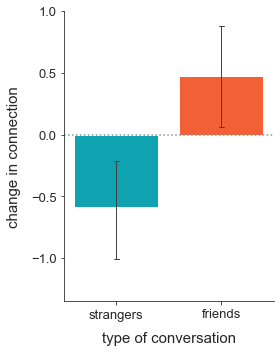

In [7]:
plt.figure(figsize=(4,5))

plt.axhline(y=0, color='#87919E', linestyle='dotted')

friend_color = '#F46036'
stranger_color = '#0FA3B1'

ax = sns.barplot(x="condition", y="connection_change_flipped", data=one_before, 
                 palette=[stranger_color, friend_color],
                saturation=1, errwidth=1,
                 capsize=.05)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('change in connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=13)
ax.set(ylim=(-1.35, 1))

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig2_bottom_entering.pdf'), transparent=True, dpi=300)


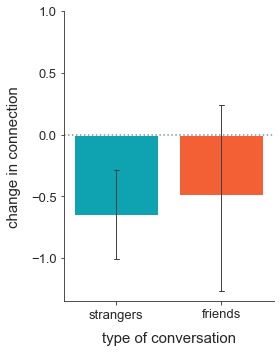

In [8]:
plt.figure(figsize=(4,5))

plt.axhline(y=0, color='#87919E', linestyle='dotted')

friend_color = '#F46036'
stranger_color = '#0FA3B1'

ax = sns.barplot(x="condition", y="connection_change", data=one_after, 
                 palette=[stranger_color, friend_color],
                saturation=1, errwidth=1,
                 capsize=.05)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('change in connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=13)
ax.set(ylim=(-1.35, 1))

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig2_bottom_exiting.pdf'), transparent=True, dpi=300)


# Study 2

Impressions of long gaps from independent raters

In [9]:
rating_data = pd.read_csv(os.path.join(base_dir, 'Analyses', 'long_gap_ratings_wide_format.csv'))
rating_data['video_num'] = rating_data['video_num'].astype(int)
data_info = pd.read_csv(os.path.join(base_dir, 'Data', 'long_gap_stimuli_info.csv'))

data_full = pd.merge(data_info, rating_data, how='inner', on=['video_num'])


## Figure 3A

Differences in perceived awkwardness in friend vs stranger conversations

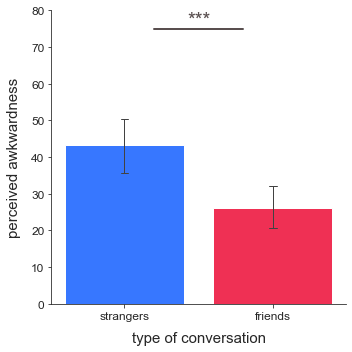

In [10]:
plt.figure(figsize=(5,5))

ax = sns.barplot(x="condition", y="awkward_mean", data=data_full, errwidth=1,
                 capsize=.05, 
                 palette=['#3777FF', '#EF3054'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('perceived awkwardness', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 80))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 75
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir, 'Figures', 'Fig3A.pdf'), dpi=300)


## Figure 3B

Differences in perceived connection in friend vs stranger conversations

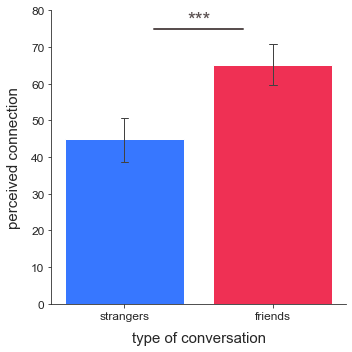

In [11]:
plt.figure(figsize=(5,5))

ax = sns.barplot(x="condition", y="connected_mean", data=data_full, errwidth=1,
                 capsize=.05, 
                 palette=['#3777FF', '#EF3054'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('perceived connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 80))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 75
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir, 'Figures', 'Fig3B.pdf'), dpi=300)


## Figure 3C

Differences in percieved awkwardness in friend vs stranger conversations, as a function of gap length

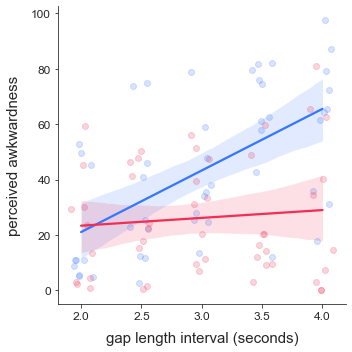

In [12]:
sns.lmplot(x="interval", y="awkward_mean", hue="condition", data=data_full,
          palette=['#3777FF', '#EF3054'], x_jitter=.1, y_jitter=None,
          scatter_kws={'alpha':0.2}, legend=False)

plt.xlabel("gap length interval (seconds)", fontsize=15, labelpad=10)
plt.ylabel("perceived awkwardness", fontsize=15, labelpad=10)
plt.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir, 'Figures', 'Fig3C.pdf'), dpi=300)


## Figure 3D

Differences in percieved connection in friend vs stranger conversations, as a function of gap length

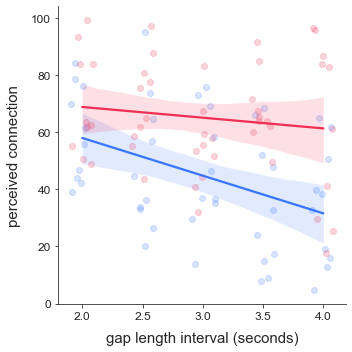

In [13]:
sns.lmplot(x="interval", y="connected_mean", hue="condition", data=data_full,
          palette=['#3777FF', '#EF3054'], x_jitter=.1, y_jitter=None,
          scatter_kws={'alpha':0.2}, legend=False)

plt.xlabel("gap length interval (seconds)", fontsize=15, labelpad=10)
plt.ylabel("perceived connection", fontsize=15, labelpad=10)
plt.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir, 'Figures', 'Fig3D.pdf'), dpi=300)


# Supplemental Figures

## Figure S1A

Distribution of gap lengths for stranger conversations

/Users/emma/anaconda3/envs/python3_8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


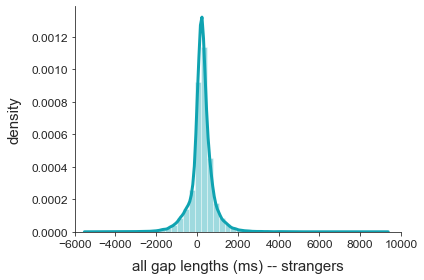

In [25]:
flist = glob.glob(os.path.join(base_dir, 'Analyses', 'turn_taking', 'strangers_pure', '*.csv'))
data = pd.read_csv(flist[0])
all_latency_values_strangers = data['gap_length']

for file in flist[1:]:
    
    data = pd.read_csv(file)
    all_latency_values_strangers = all_latency_values_strangers.append(data['gap_length'])
    
ax = sns.distplot(all_latency_values_strangers, hist = True, kde = True,
             kde_kws = {'linewidth': 3}, color='#0FA3B1')
plt.xlim(-6000, 10000)

ax.set_xlabel('all gap lengths (ms) -- strangers', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

#plt.savefig(os.path.join(base_dir,'Figures','FigS1A.pdf'), dpi=300)


## Figure S1B

Distribution of gap lengths for friend conversations

/Users/emma/anaconda3/envs/python3_8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


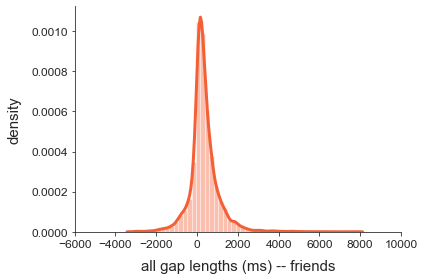

In [26]:
flist = glob.glob(os.path.join(base_dir, 'Analyses', 'turn_taking', 'friends', '*.csv'))
data = pd.read_csv(flist[0])
all_latency_values_friends = data['gap_length']

for file in flist[1:]:
    
    data = pd.read_csv(file)
    all_latency_values_friends = all_latency_values_friends.append(data['gap_length'])
    
ax = sns.distplot(all_latency_values_friends, hist = True, kde = True,
             kde_kws = {'linewidth': 3}, color='#F46036')
plt.xlim(-6000, 10000)

ax.set_xlabel('all gap lengths (ms) -- friends', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

#plt.savefig(os.path.join(base_dir,'Figures','FigS1B.pdf'), dpi=300)


## Figure S1C

A zoomed in version of both distributions, highlighting the long gaps 

/Users/emma/anaconda3/envs/python3_8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/emma/anaconda3/envs/python3_8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


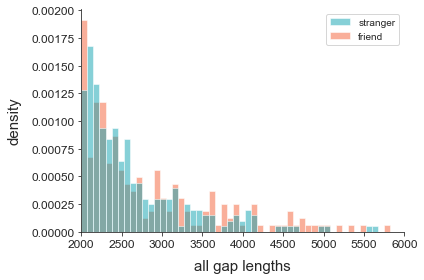

In [27]:
min_value = 2000
max_value = 6000

bins = []
interval = 75
counter = 0
new_value = 0
while new_value < max_value:
    new_value = min_value+(interval*counter)
    bins.append(new_value)
    counter += 1
    
ax = sns.distplot(all_latency_values_friends, hist = True, kde = True, bins=bins,
             kde_kws = {'linewidth': 0}, color='#F46036', label = 'friend', hist_kws=dict(alpha=0.5))
ax = sns.distplot(all_latency_values_strangers, hist = True, kde = True, bins=bins,
             kde_kws = {'linewidth': 0}, color='#0FA3B1', label = 'stranger', hist_kws=dict(alpha=0.5))

plt.xlim(min_value, max_value)

ax.set_xlabel('all gap lengths', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

sns.despine()
plt.tight_layout()

#plt.savefig(os.path.join(base_dir,'Figures','FigS1C.pdf'), dpi=300)


## Figure S2

See the notebook "Supplement - how do different bin intervals impact Figure 2?"

## Figure S3

See the notebook "Supplement - how do different thresholds impact Figure 2?"

## Figure S4A

Percentage of turns containing a question mark split by relationship type (stranger vs friend), gap length (> 2000ms (indicating a long gap) vs ≤ 2000ms) and position (before the gap vs after the gap)

In [30]:
df_total = pd.read_csv(os.path.join(base_dir, 'Analyses',
                              'semantic_content_all.csv'))
df_total['question_numeric'] = df_total['question'].replace({'yes':1, 'no':0})

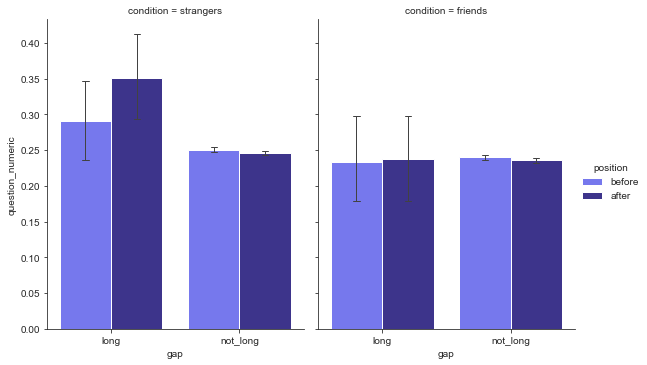

In [31]:
sns.catplot(x="gap", y="question_numeric", hue="position",
                col="condition", data=df_total,
                height=5, aspect=.8, kind='bar', 
            saturation=1, errwidth=1, capsize=.05,
           palette=['#7678ed', '#3d348b'])

#plt.savefig(os.path.join(base_dir,'Figures','supplement_questions.pdf'), dpi=300)

## Figure S4B

Word count of turns containing a question mark split by relationship type (stranger vs friend), gap length (> 2000ms (indicating a long gap) vs ≤ 2000ms) and position (before the gap vs after the gap). 

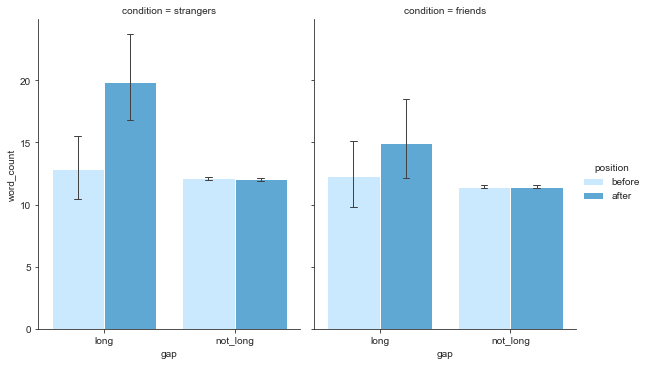

In [32]:
sns.catplot(x="gap", y="word_count", hue="position",
                col="condition", data=df_total,
                height=5, aspect=.8, kind='bar', 
            saturation=1, errwidth=1, capsize=.05,
           palette=['#cae9ff', '#5fa8d3'])

#plt.savefig(os.path.join(base_dir,'Figures','supplement_word_count.pdf'), dpi=300)